# Adversarial Attacks

## Utility functions to improve workflow

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
# BIS tools

import biswebpython.core.bis_baseutils as bis_baseutils
import biswebpython.core.bis_objects as bis

In [2]:
# Load images

test_mask = bis.bisImage().load('data/raw/GLIA_session1_mouse53_mask.nii')
test_img = bis.bisImage().load('data/raw/GLIA_session1_mouse53.nii')

train_mask = bis.bisImage().load('data/raw/SLC_session3_mouse09_mask.nii')

++++ loaded  data/raw/GLIA_session1_mouse53_mask.nii. dims=[64, 64, 78, 1, 1] spa=[0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 1.0, 1.0] orientation=LPS tp=float32
++++ loaded  data/raw/GLIA_session1_mouse53.nii. dims=[64, 64, 78, 1, 1] spa=[0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 1.0, 1.0] orientation=LPS tp=int16
++++ loaded  data/raw/SLC_session3_mouse09_mask.nii. dims=[64, 64, 78, 1, 1] spa=[0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 1.0, 1.0] orientation=LPS tp=float32


In [3]:
# # Perturbation
# test_mask.data_array[0][0][0] = 1

In [4]:
# Make images brighter by setting a maximum value


def get_scaled_img(img_array):
    scaled_img = copy.deepcopy(img_array)
    max_val = np.max(scaled_img)
    new_max = int(max_val / 2)
    print('Max Int: ' + str(new_max))
    for val in np.nditer(scaled_img, op_flags=['readwrite']):
        if val > new_max:
            val[...] = new_max
    return scaled_img

In [5]:
# Front view ("Axial"): xy plane
# Side view ("Sagittal"): yz plane
# Top view ("Coronal"): xz plane


def view_slice(img, x, y, z):
    if (
        x > img.data_array.shape[0]
        or y > img.data_array.shape[1]
        or z > img.data_array.shape[2]
    ):
        raise ValueError("Dimension out of bounds.")

    scaled_img = get_scaled_img(img.data_array)
    xy_plane = scaled_img[:, :, z]
    yz_plane = scaled_img[x, :, :]
    xz_plane = scaled_img[:, y, :]

    plt.figure(figsize=(20, 20))
    plt.subplot(131)
    plt.imshow(xy_plane, cmap='gray')
    plt.title('Axial View')

    plt.subplot(132)
    plt.imshow(yz_plane, cmap='gray')
    plt.title('Sagittal View')

    plt.subplot(133)
    plt.imshow(xz_plane, cmap='gray')
    plt.title('Coronal View')

Max Int: 16383


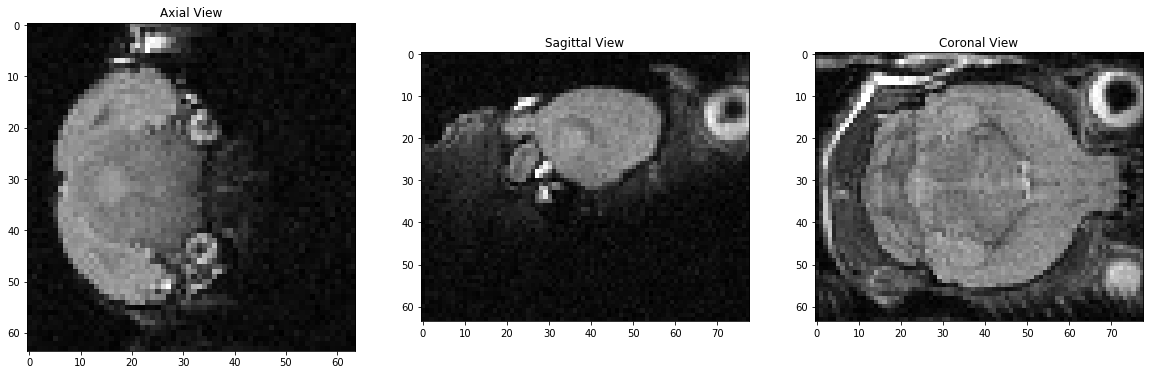

In [6]:
view_slice(test_img, 50, 20, 30)

## Importing the pre-trained model
https://cv-tricks.com/tensorflow-tutorial/save-restore-tensorflow-models-quick-complete-tutorial/

In [8]:
import tensorflow as tf

In [10]:
# The .meta file saves the structure of the network.

trained_mouse_network = tf.compat.v1.train.import_meta_graph('./mouse_network/model.ckpt-20000.meta')

RuntimeError: Exporting/importing meta graphs is not supported when eager execution is enabled. No graph exists when eager execution is enabled.